In [1]:
from IPython.display import Math

Mirror Descent Algorithm

In [2]:
Math('\\nabla\Phi(x_{t+1})=\\nabla\Phi(x_t)-\lambda_t\\nabla f(x_t)')

<IPython.core.display.Math object>

Bergman Divergence

In [3]:
Math('d(x,y) = \Phi(x) - \Phi(y) - \langle\\nabla \Phi(y), x-y\\rangle')

<IPython.core.display.Math object>

Gradient Descent Optimization

In [4]:
Math('x_{t+1} = \\arg \min_x \left(\langle \\nabla f(x_t), x\\rangle + \\frac 1 \lambda_t ||x-x_t||^2 \\right)')

<IPython.core.display.Math object>

Mirror Descent Optimization

In [5]:
Math('x_{t+1} = \\arg \min_x \left(\\langle \\nabla f(x_t), x\\rangle + \\frac 1 \lambda_t d(x,x_t) \\right)')

<IPython.core.display.Math object>

* Amir Beck and Marc Teboulle. Mirror descent and nonlinear projected subgradient methods for convex optimization. Operations Research Letters, 31(3):167–175, 2003

Gradient Descent Convergence Rate

In [6]:
Math('\sqrt{\\frac{n}{k}}')

<IPython.core.display.Math object>

Mirror Descent Convergence Rate

In [7]:
Math('\sqrt{\\frac{\log(n)}{k}}')

<IPython.core.display.Math object>

* Reshetova Daria. Multi-Class Classification: Mirror Descent Approach. arXiv.org, 2016

In [8]:
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [9]:
from sklearn import datasets

data = datasets.load_digits()
x = data.data
y = data.target

In [10]:
x_train_validation, x_test, y_train_validation, y_test =\
    model_selection.train_test_split(x, y, test_size=0.33, stratify = y, random_state = 7)

In [11]:
x_train, x_validation, y_train, y_validation =\
    model_selection.train_test_split(x_train_validation, y_train_validation, test_size = 0.2, stratify = y_train_validation, random_state = 7)

In [12]:
scaler_tv = preprocessing.StandardScaler()
scaler_tv.fit(x_train)
x_train = scaler_tv.transform(x_train)
x_validation = scaler_tv.transform(x_validation)

In [13]:
scaler_tt = preprocessing.StandardScaler()
scaler_tt.fit(x_train_validation)
x_train_validation = scaler_tt.transform(x_train_validation)
x_test = scaler_tt.transform(x_test)

In [14]:
from linear_classifier import LinearSVM

results = {}
types = ["l1", "l2", "l3", "l4"]

for norm in types:
    best_val = -1
    best_svm = None

    learning_rate = [10 ** (-i) for i in range(1, 5)]
    reg = [10 ** (-i) for i in range(1, 5)]
    num_iters = 1000

    for i in range(len(learning_rate)):
        for j in range(len(reg)):

            svm = LinearSVM()

            loss_hist = svm.train(x_train, y_train, learning_rate=learning_rate[i],
                                  reg=reg[j], norm=norm, num_iters=num_iters,
                                  batch_size=200, verbose=False)

            y_train_pred = svm.predict(x_train)
            train_accuracy = np.mean(y_train_pred == y_train)
            y_val_pred   = svm.predict(x_validation)
            val_accuracy   = np.mean(y_val_pred == y_validation)

            if best_val < val_accuracy:
                best_val, best_learning_rate, best_reg = val_accuracy, learning_rate[i], reg[j]

            results[norm] = (best_val, best_learning_rate, best_reg)

In [15]:
results

{'l1': (0.9377593360995851, 0.1, 0.01),
 'l2': (0.9585062240663901, 0.1, 0.1),
 'l3': (0.9585062240663901, 0.1, 0.1),
 'l4': (0.9543568464730291, 0.1, 0.1)}

In [16]:
num_iters = 1000
loss_hist = {}
test_accuracy = {}
conf_matrix = {}

for norm in types:
    svm = LinearSVM()

    loss_hist[norm] = svm.train(x_train_validation, y_train_validation, learning_rate=results[norm][1],
                          reg=results[norm][2], norm=norm, num_iters=num_iters,
                          batch_size=200, verbose=False)

    y_test_pred = svm.predict(x_test)
    test_accuracy[norm] = np.mean(y_test_pred == y_test)
    conf_matrix[norm] = metrics.confusion_matrix(y_test, y_test_pred)

In [17]:
test_accuracy

{'l1': 0.9107744107744108,
 'l2': 0.9663299663299664,
 'l3': 0.9612794612794613,
 'l4': 0.9478114478114478}

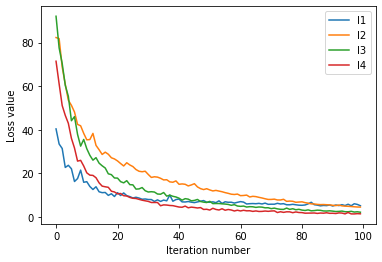

In [18]:
import matplotlib.pyplot as plt

for norm in types:
    plt.plot(loss_hist[norm][0:100], label = norm)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

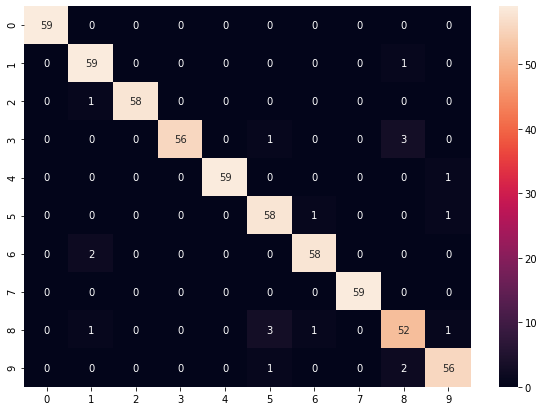

In [19]:
dcm = pd.DataFrame(conf_matrix["l2"])
plt.figure(figsize = (10,7))
sn.heatmap(dcm, annot=True)